<a href="https://colab.research.google.com/github/w217423151/Midterm-ITAI-1371-Group-4/blob/Kim/Midterm_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Perform a cleanup on it using the guidelines you learnt
# COMPLETED PIPELINE SUMMARY
# ------------------------------
# 1. Data loading & exploration
# 2. Removed unnecessary and constant columns
#    *** Separate Target variable from the dataset
# 3  *** Feature engineering (outliers, binning, domain features)
# 4  *** Filling Nan and Null values with appropriate values - Handled missing values
# 5  *** One-hot encoding - Encoded categorical features / Encoding: Converting categorical txt to numbers
#    *** Encoding the Target Variable
# 6. *** Scaling Stardarizing : Changing the range of your data - Scaled and normalized data
#    *** Scaling Normalization: Adjusting the shape of your data's distribution
# 7. Correlation-based feature reduction with visualization
# 8. Train-test split
# 9. Random Forest model training
# 10 Performance evaluation and ROC
# 11 Income Distribution – Target Variable Analysis
# 12 *** predication whether a person will be making more than $50k.

# Perform a cleanup on it using the guidelines you learnt .

# Also discuss and write a paper with all the techniques you implemented.
# Build a Jupyter notebook to show the dataset before and after cleanup.
# Also discuss how you would use this dataset to solve a ML problem.


In [5]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [6]:
import numpy as np


In [7]:
import pandas as pd

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
# 01 - Data loading & exploration
# To upload the file, go to the "Files" tab on the left sidebar, click on the upload icon, and select your 'adult.csv' file.
# After uploading, you can get the file path by hovering over the file name, clicking the three dots, and selecting "Copy path".
# Then, replace the placeholder below with the copied path.
from google.colab import files
uploaded = files.upload()
# Replace "" with the path to your uploaded 'adult.csv' file
df = pd.read_csv('adult.csv')

Saving adult.csv to adult.csv


### 1. Data loading & exploration

In [13]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [14]:
df.shape

(32561, 15)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
df.isnull()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [18]:
df.replace("?",np.nan, inplace = True)


In [19]:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


#### 02 Removed unnecessary and constant columns

In [20]:
# 02 Removed unnecessary and constant columns
"""
Unnecessary columns can include:
1. Identifier-like columns (e.g., 'id', 'fnlwgt' if not useful)
2. Duplicate or constant-value columns
3. Columns with too many unique values relative to dataset size
4. Irrelevant for modeling (like names or timestamps)

We'll detect and remove such columns automatically.
"""

# Check constant columns (only one unique value)
constant_cols = [col for col in df.columns if df[col].nunique() == 1]

# Check quasi-identifiers (e.g., 'fnlwgt' in Adult dataset)
# 'fnlwgt' is a census weight — not useful for prediction.
unnecessary_cols = constant_cols + ['fnlwgt']

# Drop the unnecessary columns
df.drop(columns=unnecessary_cols, inplace=True, errors='ignore')

print("Constant columns: ", constant_cols)
print(f"Dropped columns: {unnecessary_cols}")
print("Remaining columns:", df.columns.tolist())


Constant columns:  []
Dropped columns: ['fnlwgt']
Remaining columns: ['age', 'workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']



--- Bar Plots for Categorical Variables ---


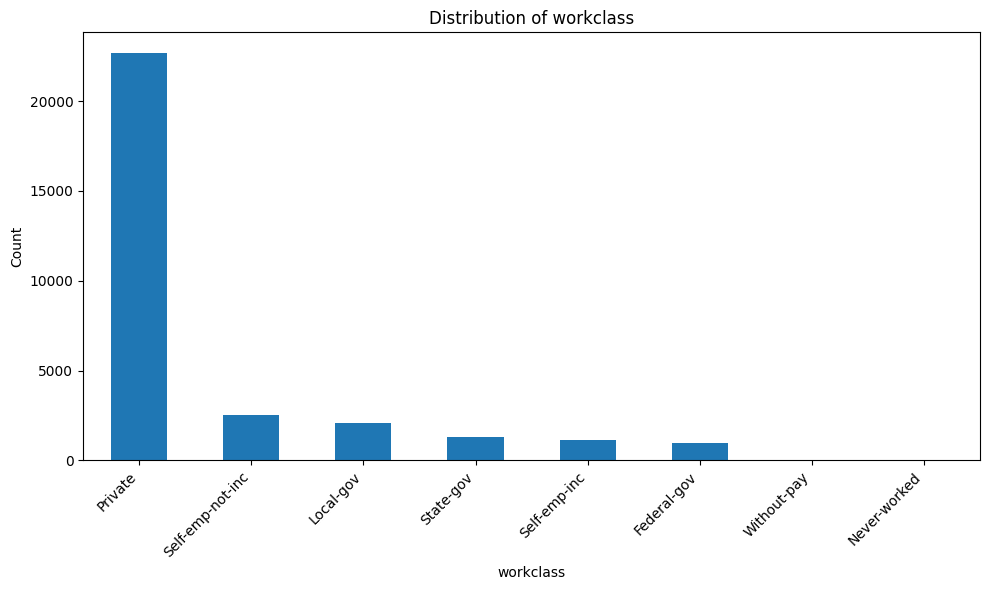

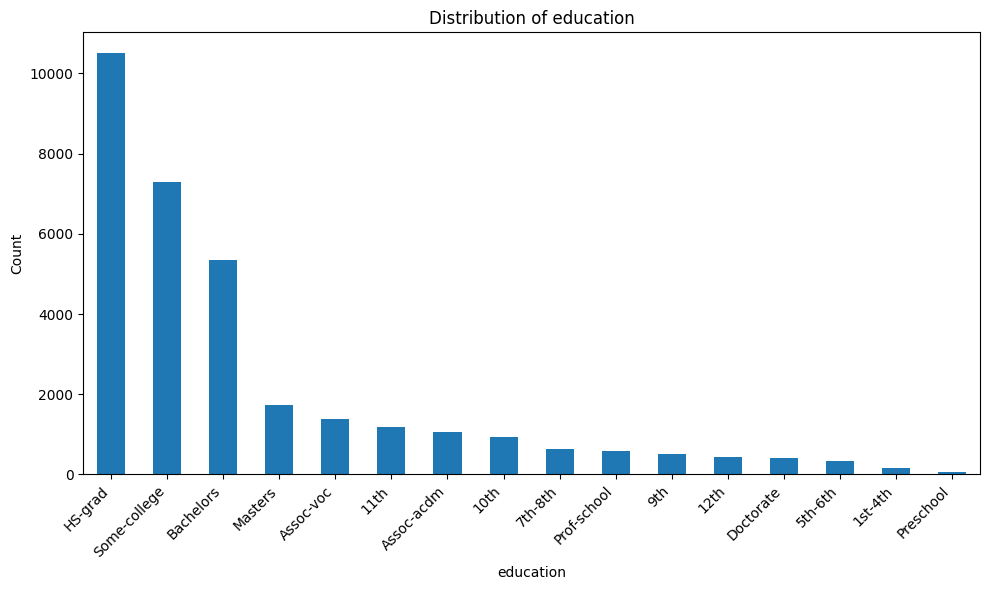

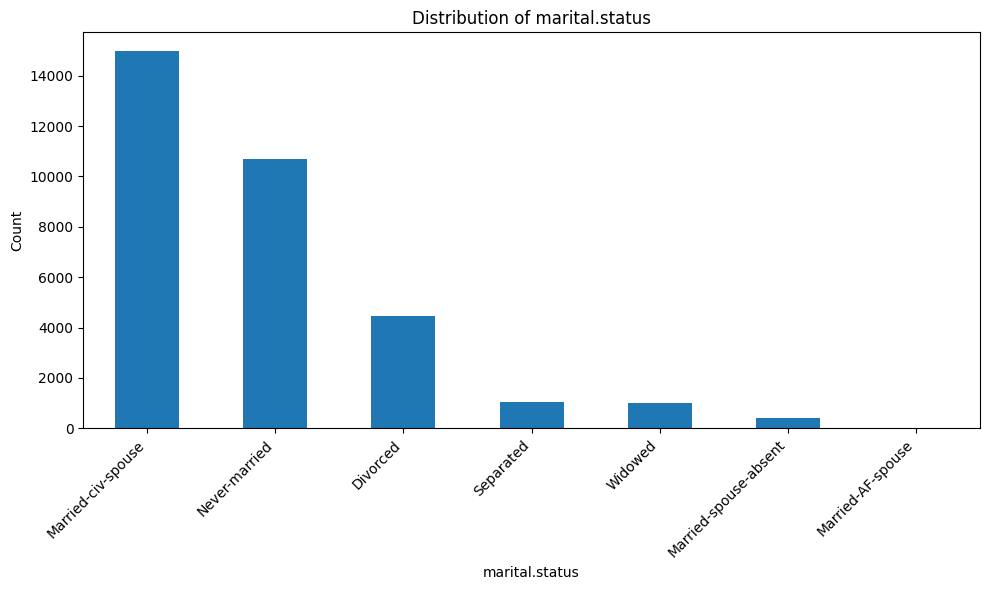

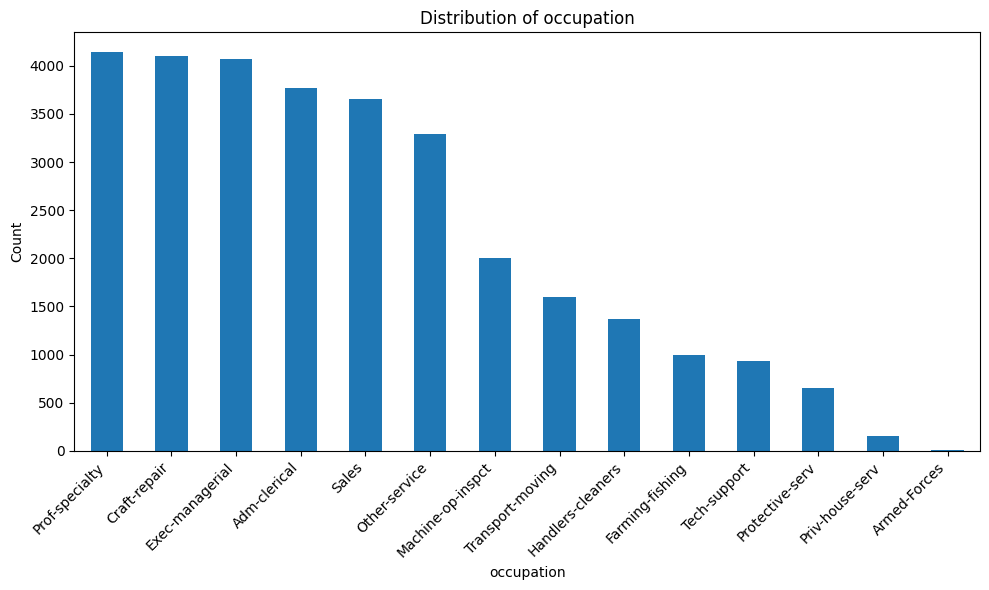

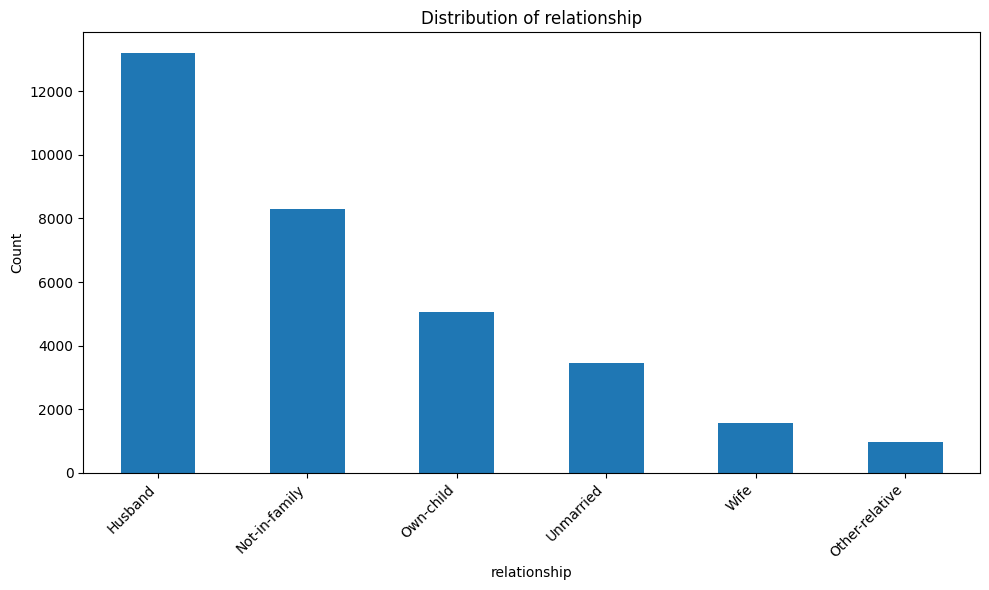

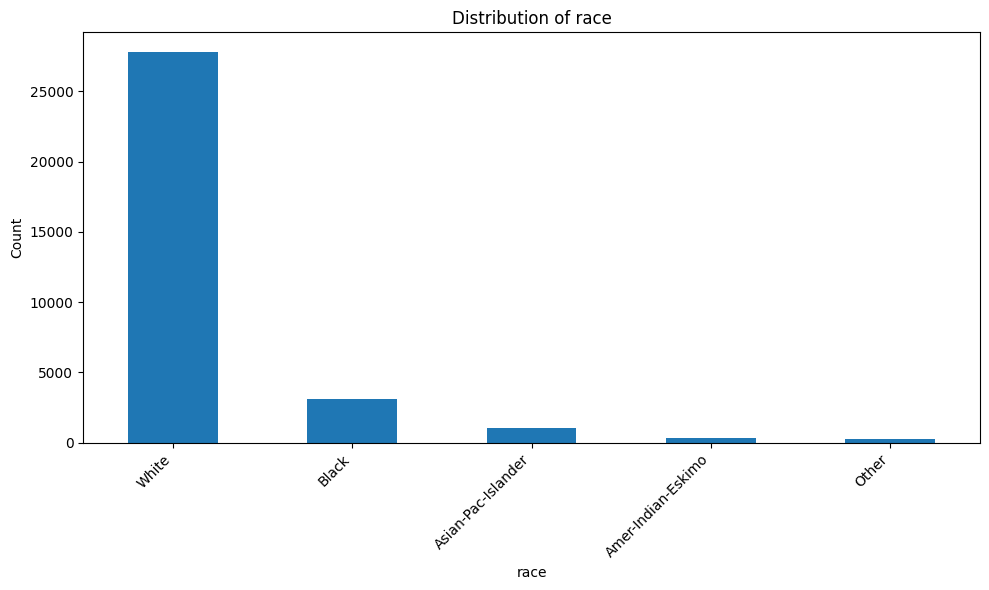

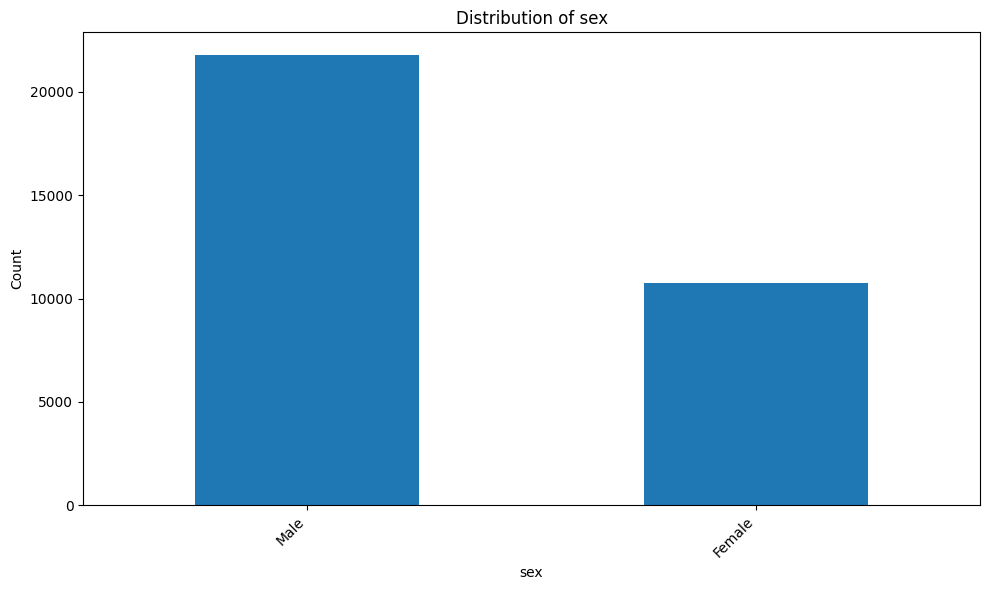

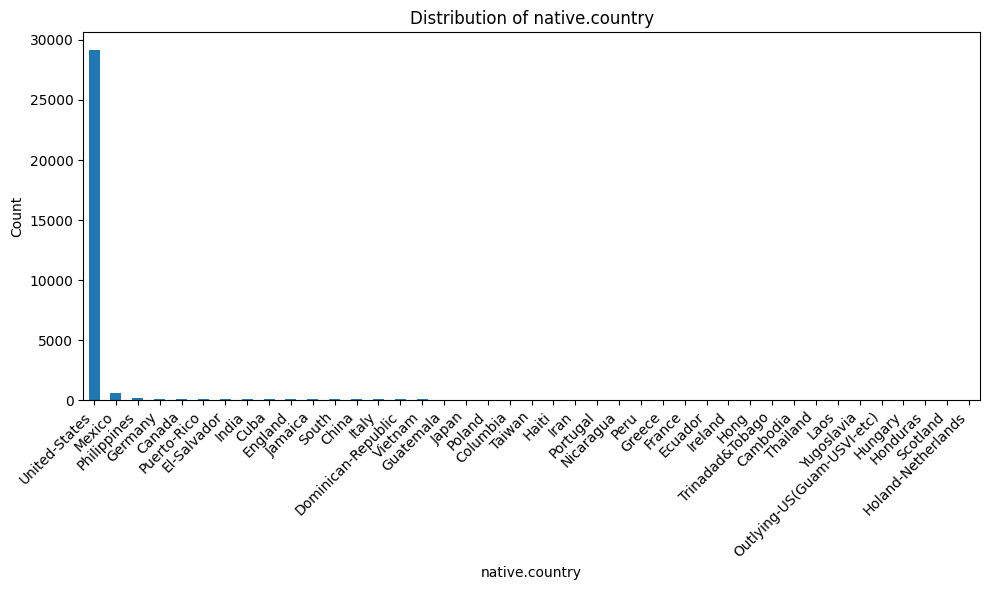

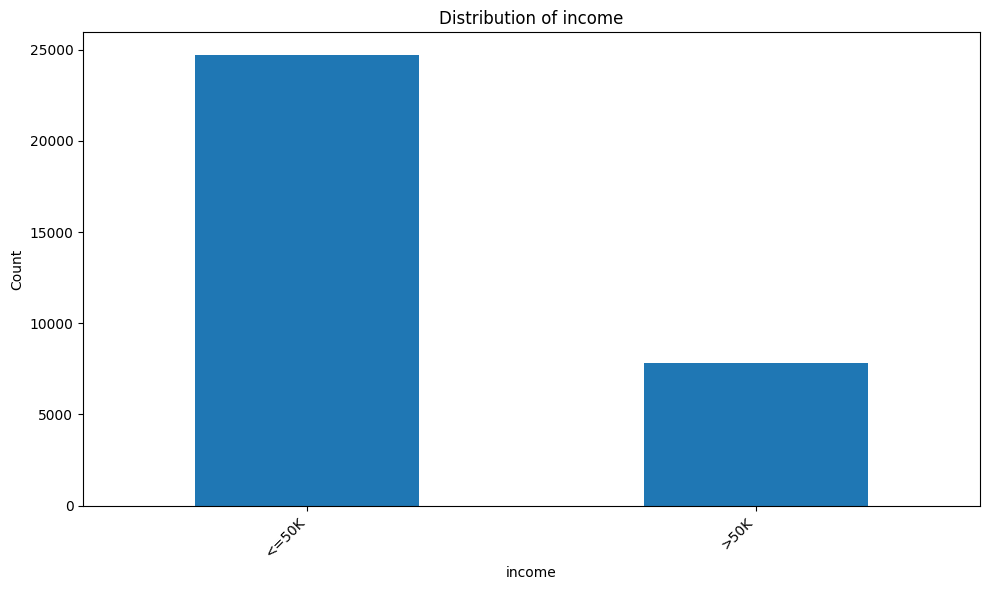

In [21]:
# Bar plots for categorical variables
print("\n--- Bar Plots for Categorical Variables ---")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


--- Box Plots for Numerical Variables ---


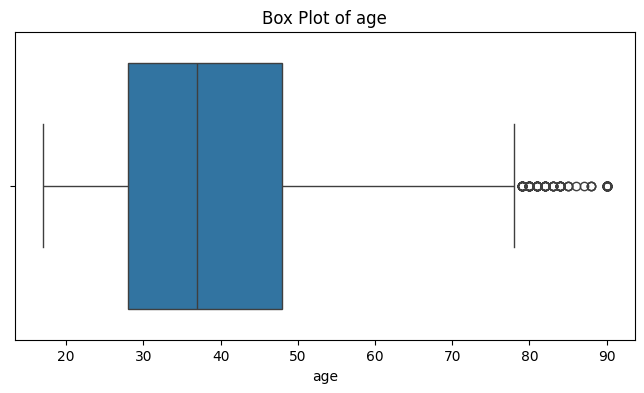

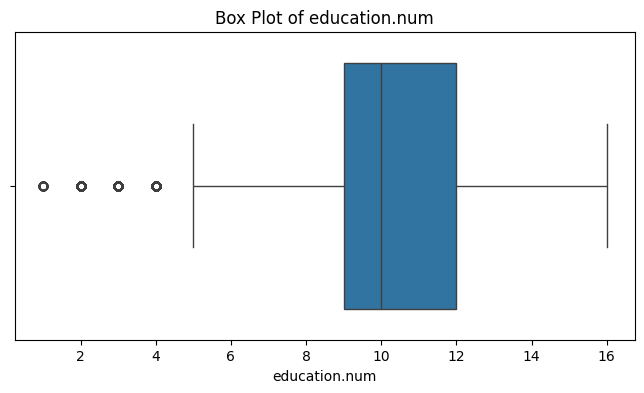

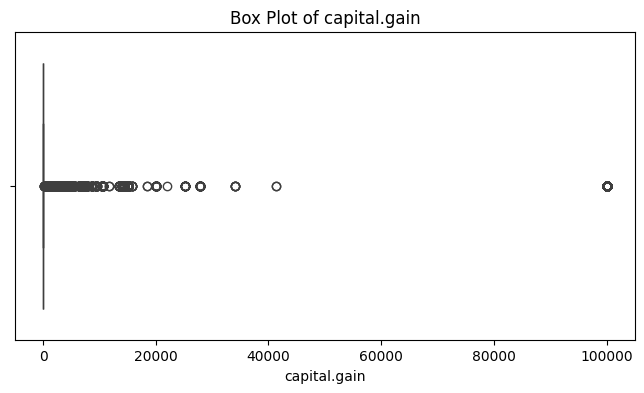

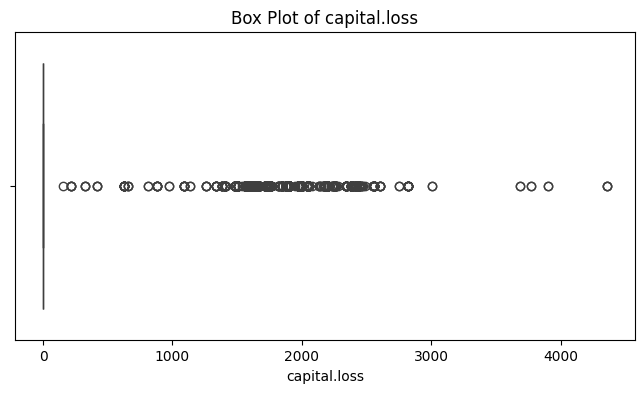

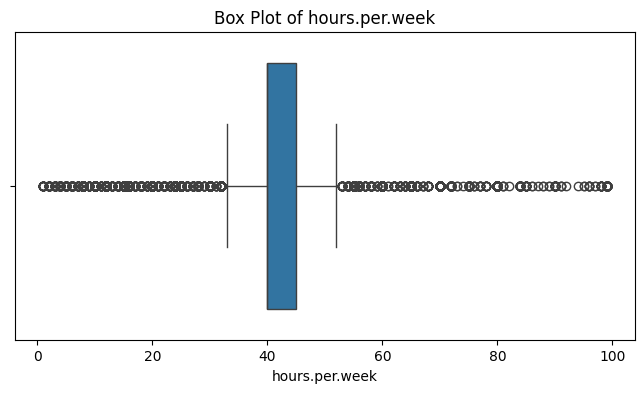

In [22]:
# Box plots for numerical variables to identify outliers
print("\n--- Box Plots for Numerical Variables ---")
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [23]:
# Separate Target Variable ( predict: income )

target_col = 'income'
X = df.drop(columns=[target_col])
y = df[target_col]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (32561, 13)
Target shape: (32561,)


### 03 Feature engineering

In [24]:
X['age_bin'] = pd.cut(
    X['age'],
    bins=[0, 25, 35, 45, 55, 65, 100],
    labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+']
)


In [25]:

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("\nNumerical Columns:", numerical_cols)

Categorical Columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

Numerical Columns: ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [26]:
def remove_outliers_iqr(df, columns, factor=1.5):
    for col in columns:
        Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - factor * IQR, Q3 + factor * IQR
        df[col] = np.clip(df[col], lower, upper)
    return df

X_scaled_minmax = remove_outliers_iqr(X, numerical_cols)


### 4  *** Filling Nan and Null values with appropriate values - Handled missing values  


In [27]:
# Strategy:
# - Categorical: Fill with mode (most frequent)
# - Numerical: Fill with median

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

# Remove 'income' from categorical_cols as it's not in X
categorical_cols_for_imputation = [col for col in categorical_cols if col != 'income']

X[categorical_cols_for_imputation] = cat_imputer.fit_transform(X[categorical_cols_for_imputation])
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])


print("Missing values after imputation:\n", X.isna().sum().sum())

Missing values after imputation:
 0


In [28]:
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [29]:
X.isnull().sum()
# how many values are Nah

,0
age,0
workclass,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0
capital.gain,0


In [30]:
X.shape

(32561, 14)

In [31]:
X.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.0,32561.0,32561.000000
mean,38.555603,10.124321,0.0,0.0,41.202451
std,13.556130,2.459770,0.0,0.0,6.187005
min,17.000000,4.500000,0.0,0.0,32.500000
25%,28.000000,9.000000,0.0,0.0,40.000000
50%,37.000000,10.000000,0.0,0.0,40.000000
75%,48.000000,12.000000,0.0,0.0,45.000000
max,78.000000,16.000000,0.0,0.0,52.500000


### # 5  One-hot encoding - Encoded categorical features

In [32]:
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [33]:
# Encoded categorical features / Encoding: Converting categorical txt to numbers

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_cols = pd.DataFrame(
    encoder.fit_transform(X[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)

# Merge encoded columns with numerical features
X_encoded = pd.concat([X[numerical_cols], encoded_cols], axis=1)

print("Shape after encoding:", X_encoded.shape)
X_encoded.head()

Shape after encoding: (32561, 96)


,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,78.0,9.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,78.0,9.0,0.0,0.0,32.5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,66.0,10.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,54.0,4.5,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,41.0,10.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
# Encoding the Target Variable
# Income: <=50K or >50K

y_encoded = LabelEncoder().fit_transform(y)

print("Encoded target values:", np.unique(y_encoded))

Encoded target values: [0 1]


### 6. Scaling Stardarizing : Changing the range of your data - Scaled and normalized data


In [46]:
# Scaling Standar
# Scaling: Change range (StandardScaler)
scaler_standard = StandardScaler()


# Standard Scaled version
X_scaled_standard = pd.DataFrame(
    scaler_standard.fit_transform(X_encoded),
    columns=X_encoded.columns)
X_scaled_standard.describe()


,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
count,3.256100e+04,3.256100e+04,32561.0,32561.0,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,...,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-1.571176e-17,2.967778e-17,0.0,0.0,-3.491503e-16,-3.491503e-18,-4.364379e-18,-1.204569e-16,5.237255e-17,-7.244869e-17,...,-1.112917e-17,1.702108e-17,6.110131e-18,1.309314e-17,4.146160e-18,1.745752e-18,-1.047451e-17,-8.859690e-17,2.214922e-17,5.673693e-18
std,1.000015e+00,1.000015e+00,0.0,0.0,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.590124e+00,-2.286558e+00,0.0,0.0,-1.406591e+00,-2.620974e-01,-1.466381e-02,-1.747977e+00,-1.883893e-01,-2.909357e-01,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-3.960742e-02,-2.351838e-02,-2.416321e-02,-3.255119e+00,-4.540836e-02,-2.217266e-02
25%,-7.786710e-01,-4.570906e-01,0.0,0.0,-1.943540e-01,-2.620974e-01,-1.466381e-02,5.720899e-01,-1.883893e-01,-2.909357e-01,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-3.960742e-02,-2.351838e-02,-2.416321e-02,3.072085e-01,-4.540836e-02,-2.217266e-02
50%,-1.147545e-01,-5.054229e-02,0.0,0.0,-1.943540e-01,-2.620974e-01,-1.466381e-02,5.720899e-01,-1.883893e-01,-2.909357e-01,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-3.960742e-02,-2.351838e-02,-2.416321e-02,3.072085e-01,-4.540836e-02,-2.217266e-02
75%,6.966990e-01,7.625543e-01,0.0,0.0,6.138038e-01,-2.620974e-01,-1.466381e-02,5.720899e-01,-1.883893e-01,-2.909357e-01,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-3.960742e-02,-2.351838e-02,-2.416321e-02,3.072085e-01,-4.540836e-02,-2.217266e-02
max,2.909754e+00,2.388748e+00,0.0,0.0,1.826041e+00,3.815376e+00,6.819510e+01,5.720899e-01,5.308156e+00,3.437186e+00,...,2.964839e+01,1.687077e+01,5.208087e+01,2.014975e+01,2.524779e+01,4.251993e+01,4.138522e+01,3.072085e-01,2.202238e+01,4.510058e+01


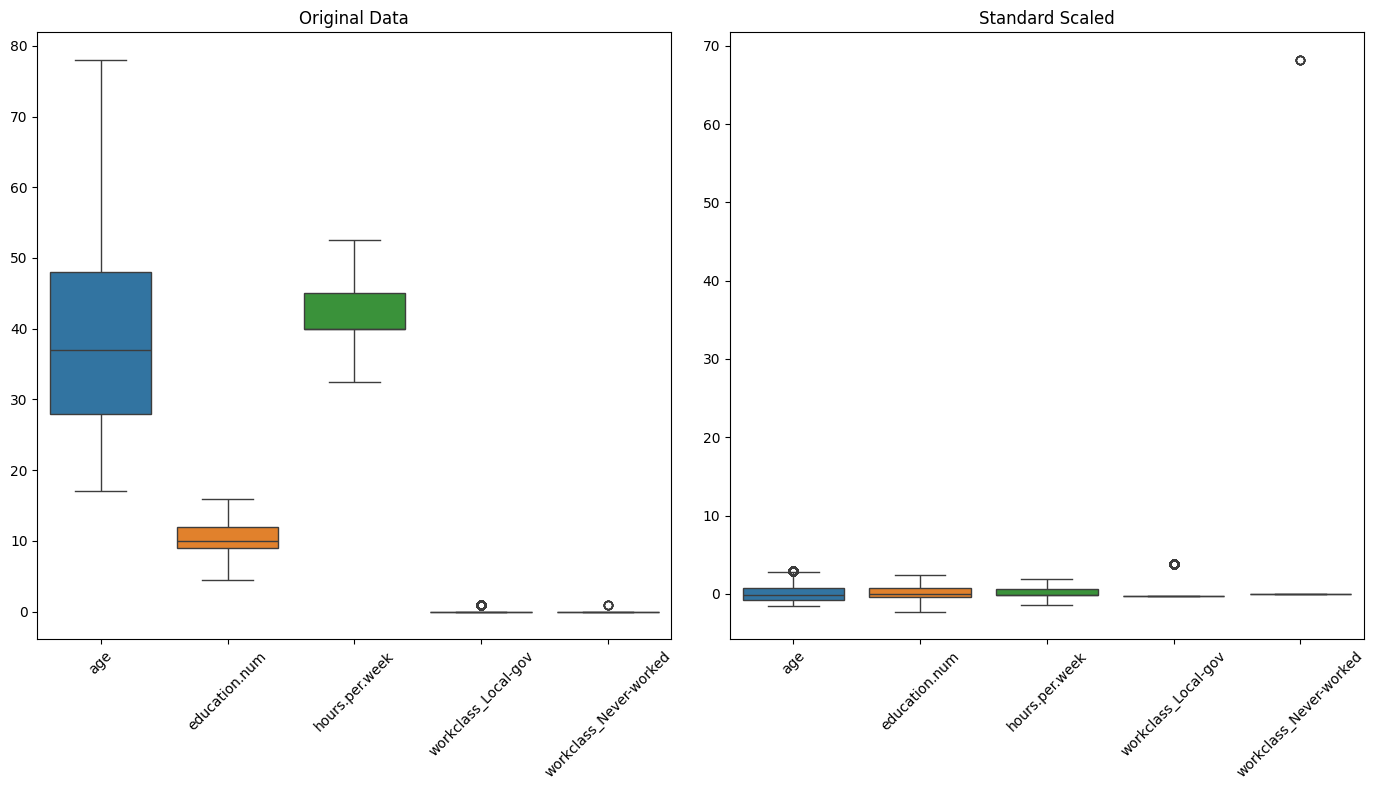

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: choose a few numeric columns to visualize
cols_to_plot = ['age', 'education.num', 'hours.per.week', 'workclass_Local-gov', 'workclass_Never-worked']

# Create 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Original data
sns.boxplot(data=X_encoded[cols_to_plot], ax=axes[0])
axes[0].set_title("Original Data")
axes[0].tick_params(axis='x', rotation=45)

# Standard Scaled data
sns.boxplot(data=X_scaled_standard[cols_to_plot], ax=axes[1])
axes[1].set_title("Standard Scaled")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [36]:
print("After Standard Scaling:\n", X_scaled_standard.head(2))

After Standard Scaling:
         age  education.num  capital.gain  capital.loss  hours.per.week  \
0  2.909754      -0.457091           0.0           0.0       -0.194354   
1  2.909754      -0.457091           0.0           0.0       -1.406591   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0            -0.262097               -0.014664            0.57209   
1            -0.262097               -0.014664            0.57209   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
0               -0.188389                   -0.290936  ...   
1               -0.188389                   -0.290936  ...   

   native.country_Portugal  native.country_Puerto-Rico  \
0                -0.033729                   -0.059274   
1                -0.033729                   -0.059274   

   native.country_Scotland  native.country_South  native.country_Taiwan  \
0                -0.019201             -0.049628              -0.039607   
1                -0.019201      

###  6. Scaling Normalization: Adjusting the shape of your data's distribution

In [37]:
# Scaling and Normalization


# Normalization: Adjust shape (MinMaxScaler)
# MinMax Normalized version
scaler_minmax = MinMaxScaler()
X_scaled_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(X_encoded),
    columns=X_encoded.columns
)

# Display example
print("\nAfter MinMax Normalization:\n", X_scaled_minmax.head(2))



After MinMax Normalization:
    age  education.num  capital.gain  capital.loss  hours.per.week  \
0  1.0       0.391304           0.0           0.0           0.375   
1  1.0       0.391304           0.0           0.0           0.000   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                  0.0                     0.0                1.0   
1                  0.0                     0.0                1.0   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
0                     0.0                         0.0  ...   
1                     0.0                         0.0  ...   

   native.country_Portugal  native.country_Puerto-Rico  \
0                      0.0                         0.0   
1                      0.0                         0.0   

   native.country_Scotland  native.country_South  native.country_Taiwan  \
0                      0.0                   0.0                    0.0   
1                      0.0                

### 7. Correlation-based feature reduction with visualization


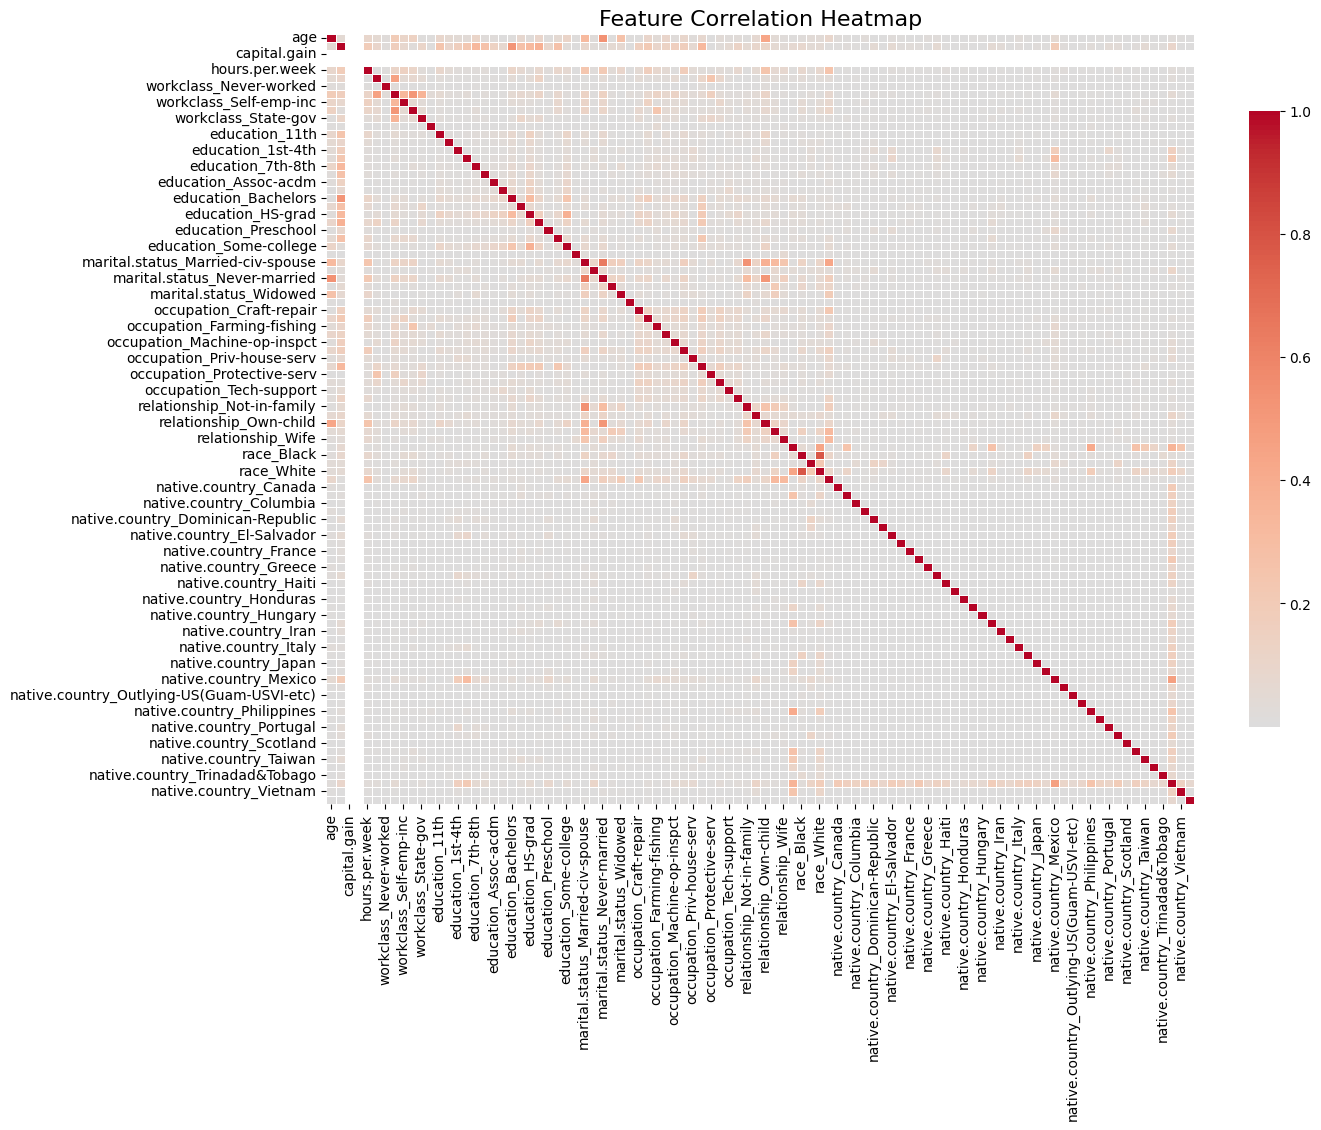

In [38]:
# Correlation-Based Feature Reduction

corr_matrix = X_scaled_minmax.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()




In [39]:
# Drop columns with correlation > 0.9

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

X_scaled_minmax.drop(columns=to_drop, inplace=True, errors='ignore')

print(f"Removed {len(to_drop)} highly correlated columns.")

Removed 0 highly correlated columns.


### 8. Train-test split


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_minmax, y_encoded, test_size=0.3, random_state=42, stratify=y)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (22792, 96) (22792,)
Test set shape: (9769, 96) (9769,)


### 9. Random Forest model training

### 10 Performance evaluation and ROC



In [41]:
# Project : Predict whether a person will be making more than $50k
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


print("\n--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# The code below provides a solution to predict income bracket for making more than 50k using the adult.csv dataset,
# covering all necessary steps from data cleaning and preprocessing to model training and evaluation using Logistic Regression.
# Accurancy: The overall percentage of predictions the model got
# Fi-Score: providing a balanced measure of performance.
# AUC means evaluation.The model has a high ability to distinguish between the two income classes.


--- Logistic Regression Model Evaluation ---
Accuracy: 0.7807
F1-Score: 0.6477
AUC: 0.8822


# 11 Income Distribution – Target Variable Analysis


/tmp/ipython-input-4223323675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, palette='Set2')


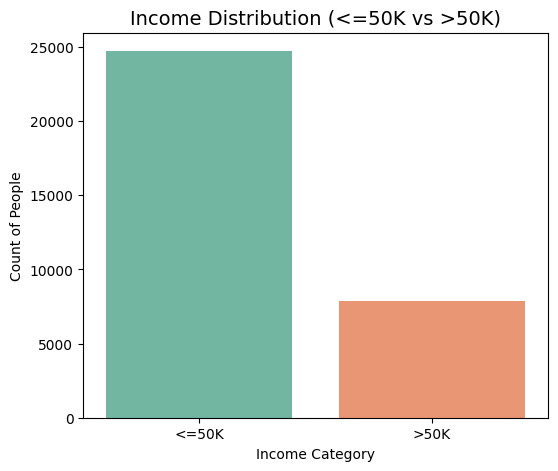

🔹 Income Distribution Summary:


,Count,Percentage
income,,
<=50K,24720,75.92
>50K,7841,24.08


In [42]:
#Income Distribution – Target Variable Analysis

plt.figure(figsize=(6, 5))
sns.countplot(x='income', data=df, palette='Set2')

plt.title("Income Distribution (<=50K vs >50K)", fontsize=14)
plt.xlabel("Income Category")
plt.ylabel("Count of People")
plt.show()

# Print numeric summary
income_counts = df['income'].value_counts()
income_percent = df['income'].value_counts(normalize=True) * 100

summary_df = pd.DataFrame({
    "Count": income_counts,
    "Percentage": income_percent.round(2)
})

print("🔹 Income Distribution Summary:")
display(summary_df)

### 12 predication whether a person will be making more than $50k.

/tmp/ipython-input-2547088603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='Set2')


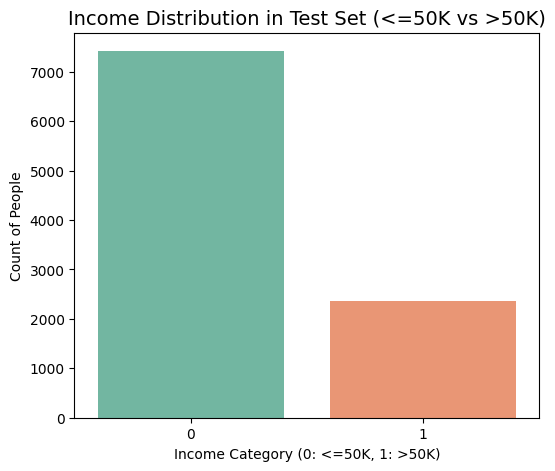

Income Distribution Summary (Test Set):


,Count,Percentage
0,7417,75.92
1,2352,24.08


In [43]:
# Income Distribution – Target Variable Analysis on Test Data

plt.figure(figsize=(6, 5))
sns.countplot(x=y_test, palette='Set2')

plt.title("Income Distribution in Test Set (<=50K vs >50K)", fontsize=14)
plt.xlabel("Income Category (0: <=50K, 1: >50K)")
plt.ylabel("Count of People")
plt.show()

# Print numeric summary
income_counts_test = pd.Series(y_test).value_counts()
income_percent_test = pd.Series(y_test).value_counts(normalize=True) * 100

summary_df_test = pd.DataFrame({
    "Count": income_counts_test,
    "Percentage": income_percent_test.round(2)
})

print("Income Distribution Summary (Test Set):")
display(summary_df_test)

In [44]:
private_high_income = df[(df['income'] == '>50K') & (df['workclass'] == 'Private')]
#these are the workclass that are private and earn more than 50K

In [45]:
private_high_income

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
10,45,Private,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
12,52,Private,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
13,32,Private,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,>50K
15,46,Private,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32535,34,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
32536,54,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32539,34,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32555,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
